# Capstone Project - The Battle of Neighborhoods


# Sydney City Nightlife Choice


# Part 1: Data about the parts of the City of Sydney

In [1]:
import numpy as np 
import pandas as pd

#!conda install -c conda-forge lxml --yes
print("Libraries installed.")

Libraries installed.


***I use pandas to create a dataframe from the table on the Wikipedia page.***

In [309]:
# Manually import list from Wikipedia

data_dicts = {'City district':['Alexandria NSW','Annandale NSW','Barangaroo NSW','Beaconsfield NSW','Camperdown NSW','Centennial Park NSW','Chippendale NSW','Darlinghurst NSW','Darlington NSW','Dawes Point NSW','Elizabeth Bay NSW','Erskineville NSW','Eveleigh NSW','Forest Lodge NSW','Glebe NSW','Haymarket NSW','Millers Point NSW','Moore Park NSW','Newtown NSW','Paddington NSW','Potts Point NSW','Pyrmont NSW','Redfern NSW','Rosebery NSW','Rushcutters Bay NSW','St Peters NSW','Surry Hills NSW','Sydney CBD','The Rocks NSW','Ultimo NSW','Waterloo NSW','Woolloomooloo NSW','Zetland NSW']}

# Convert list of dicts to dataframe
df = pd.DataFrame(data_dicts)

In [310]:
df.head()

,City district
0,Alexandria NSW
1,Annandale NSW
2,Barangaroo NSW
3,Beaconsfield NSW
4,Camperdown NSW


***C: Print the number of rows in the dataframe with method shape.

In [311]:
df.shape

(33, 1)

# Part 2: Geospatial data from Foursquare

In [240]:
#!conda install -c conda-forge geopy --yes

In [312]:
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
geolocator = Nominatim(user_agent="Sydney_nightlife")

df['Major_Dist_Coord']= df['City district'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df[['Latitude', 'Longitude']] = df['Major_Dist_Coord'].apply(pd.Series)

df.drop(['Major_Dist_Coord'], axis=1, inplace=True)
df

,City district,Latitude,Longitude
0,Alexandria NSW,-33.909157,151.192128
1,Annandale NSW,-33.881224,151.170998
2,Barangaroo NSW,-33.861408,151.201688
3,Beaconsfield NSW,-33.911469,151.200315
4,Camperdown NSW,-33.889612,151.180099
5,Centennial Park NSW,-33.897778,151.233889
6,Chippendale NSW,-33.886329,151.199821
7,Darlinghurst NSW,-33.878338,151.219225
8,Darlington NSW,-33.890862,151.193216
9,Dawes Point NSW,-33.857222,151.206776


# Part 3: Building clusters of the neighborhoods in the City of Sydney

In [242]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium
!conda install -c conda-forge folium=0.11.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: \ ^C
Libraries imported.


***A: Geographical coordinates of Sydney***

In [307]:
address = 'Sydney'

geolocator = Nominatim(user_agent="Sydney_nightlife")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Sydney are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Sydney are -33.8548157, 151.2164539.


***B: Visualization of Sydney's neighborhoods***

In [313]:
# create map of Sydney using latitude and longitude 
map_sydney = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to the map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['City district']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sydney) 
    
map_sydney

***C: Using Foursquare API, I will explore the neighborhoods of Sydney and segment them.***

In [246]:
# The code was removed by Watson Studio for sharing.
CLIENT_ID = 'QOR5CN0SPNGEMRAM0HXKICOW5X3SYHSCTOIULJNQJEXGJPIV' # your Foursquare ID
CLIENT_SECRET = 'XSEH1J1OOEDWCYM4MBYKKKI00FFJ2A5ZHKKMQDUUASTPM04Y' # your Foursquare Secret
ACCESS_TOKEN = 'Z3VOZPRFDCUVN41AHNYAT4TJN0NN0HEK3OUUMLFEPU0MYXOK' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QOR5CN0SPNGEMRAM0HXKICOW5X3SYHSCTOIULJNQJEXGJPIV
CLIENT_SECRET:XSEH1J1OOEDWCYM4MBYKKKI00FFJ2A5ZHKKMQDUUASTPM04Y


In [314]:
df.loc[0, 'City district']

'Alexandria NSW'

***D: Show the top 15 venues in Alexandria within a radius of 600 meters.***

In [315]:
neighborhood_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df.loc[0, 'City district'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Alexandria NSW are -33.9091568, 151.1921281.


In [316]:
LIMIT = 15

radius = 600

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=QOR5CN0SPNGEMRAM0HXKICOW5X3SYHSCTOIULJNQJEXGJPIV&client_secret=XSEH1J1OOEDWCYM4MBYKKKI00FFJ2A5ZHKKMQDUUASTPM04Y&v=20180604&ll=-33.9091568,151.1921281&radius=600&limit=15'

In [317]:
results = requests.get(url).json()

In [318]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [319]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,The Grounds of Alexandria,Café,-33.910774,151.194406
1,The Potting Shed at The Grounds,Bar,-33.911094,151.194306
2,Pino’s Vino e Cucina,Italian Restaurant,-33.905480,151.190950
3,The Grounds Markets,Flea Market,-33.911844,151.194729
4,Bunnings Warehouse,Hardware Store,-33.905774,151.193690


In [320]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

15 venues were returned by Foursquare.


In [321]:
print ('{} unique categories in Alexandria.'.format(nearby_venues['categories'].value_counts().shape[0]))

11 unique categories in Alexandria.


In [322]:
print (nearby_venues['categories'].value_counts()[0:15])

Café                      5
Bar                       1
Flea Market               1
Australian Restaurant     1
Furniture / Home Store    1
Pet Store                 1
Brewery                   1
Italian Restaurant        1
Hardware Store            1
Basketball Stadium        1
Lebanese Restaurant       1
Name: categories, dtype: int64


***E: Exploration of the neighbourhoods in Sydney.***

In [323]:
def getNearbyVenues(names, latitudes, longitudes, radius=3000, LIMIT=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

    
    return(nearby_venues)

In [324]:
Sydney_venues = getNearbyVenues(names=df['City district'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Alexandria NSW
Annandale NSW
Barangaroo NSW
Beaconsfield NSW
Camperdown NSW
Centennial Park NSW
Chippendale NSW
Darlinghurst NSW
Darlington NSW
Dawes Point NSW
Elizabeth Bay NSW
Erskineville NSW
Eveleigh NSW
Forest Lodge NSW
Glebe NSW
Haymarket NSW
Millers Point NSW
Moore Park NSW
Newtown NSW
Paddington NSW
Potts Point NSW
Pyrmont NSW
Redfern NSW
Rosebery NSW
Rushcutters Bay NSW
St Peters NSW
Surry Hills NSW
Sydney CBD
The Rocks NSW
Ultimo NSW
Waterloo NSW
Woolloomooloo NSW
Zetland NSW


In [325]:
Sydney_venues.shape

(3300, 7)

In [326]:
# Create a Data-Frame out of it to concentrate only on Restaurants 
Sydney_Venues_only_nightlife = Sydney_venues[Sydney_venues['Venue Category'].str.contains('Bar|Lounge|Brewery|Pub|Club|Nightclub')].reset_index(drop=True)
Sydney_Venues_only_nightlife.index = np.arange(1, len(Sydney_Venues_only_nightlife )+1)

In [327]:
print (Sydney_Venues_only_nightlife['Venue Category'].value_counts())

Bar             168
Pub             110
Cocktail Bar     94
Whisky Bar       39
Brewery          38
Wine Bar         32
Hotel Bar        20
Dive Bar         14
Sake Bar          8
Lounge            7
Comedy Club       3
Tiki Bar          1
Name: Venue Category, dtype: int64


In [328]:
#Remove rows with unrelated value
#Sydney_Venues_only_nightlife = Sydney_Venues_only_nightlife[Sydney_Venues_only_nightlife['Venue Category'] != ""]

In [330]:
print('There are {} unique categories.'.format(len(Sydney_Venues_only_nightlife['Venue Category'].unique())))

There are 12 unique categories.


In [331]:
# create a dataframe of top 10 categories
Sydney_Venues_Top10 = Sydney_Venues_only_nightlife['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
Sydney_Venues_Top10 = Sydney_Venues_Top10.reset_index()
Sydney_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Sydney_Venues_Top10

,Venue_Category,Frequency
0,Bar,168
1,Pub,110
2,Cocktail Bar,94
3,Whisky Bar,39
4,Brewery,38
5,Wine Bar,32
6,Hotel Bar,20
7,Dive Bar,14
8,Sake Bar,8
9,Lounge,7


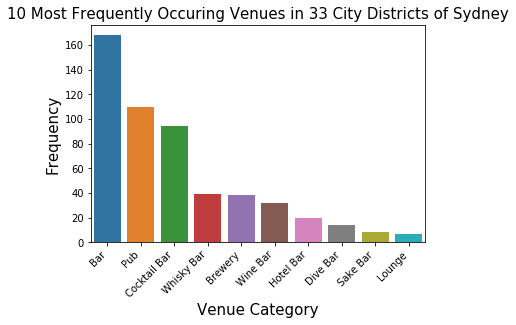

<Figure size 1296x504 with 0 Axes>

In [332]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=Sydney_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Occuring Venues in 33 City Districts of Sydney', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

***F: Size of the dataframe that results.***

In [333]:
print ("Shape of the Data-Frame with Venue Category only Nightlife: ", Sydney_Venues_only_nightlife.shape)
Sydney_Venues_only_nightlife.head(75)

Shape of the Data-Frame with Venue Category only Nightlife:  (534, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Alexandria NSW,-33.909157,151.192128,The Potting Shed at The Grounds,-33.911094,151.194306,Bar
2,Alexandria NSW,-33.909157,151.192128,Rocks Brewing Co,-33.916183,151.191414,Brewery
3,Alexandria NSW,-33.909157,151.192128,Bar No. 5,-33.902850,151.198310,Bar
4,Alexandria NSW,-33.909157,151.192128,The Hive Bar,-33.899870,151.184851,Bar
5,Alexandria NSW,-33.909157,151.192128,Rose of Australia Hotel,-33.899867,151.184998,Pub
6,Alexandria NSW,-33.909157,151.192128,Sydney Park Hotel,-33.906652,151.181363,Pub
7,Alexandria NSW,-33.909157,151.192128,Kuki Tanuki,-33.899650,151.183700,Sake Bar
8,Alexandria NSW,-33.909157,151.192128,The Union Hotel,-33.904085,151.180227,Pub
9,Alexandria NSW,-33.909157,151.192128,Earl's Juke Joint,-33.900042,151.177927,Bar
10,Alexandria NSW,-33.909157,151.192128,Doris and Beryl's Bridge Club & Tea House,-33.902663,151.179309,Cocktail Bar


In [334]:
Sydney_Venues_nightlife = Sydney_Venues_only_nightlife.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Bar|Lounge|Brewery|Pub|Club|Nightclub')].count())

***G: Analysis of the neighbourhoods.***

In [335]:
Sydney_Venues_nightlife

Neighborhood
Alexandria NSW         18
Annandale NSW          14
Barangaroo NSW         15
Beaconsfield NSW       16
Camperdown NSW         17
Centennial Park NSW     9
Chippendale NSW        17
Darlinghurst NSW       12
Darlington NSW         24
Dawes Point NSW        15
Elizabeth Bay NSW      14
Erskineville NSW       26
Eveleigh NSW           24
Forest Lodge NSW       14
Glebe NSW              16
Haymarket NSW          15
Millers Point NSW      16
Moore Park NSW         19
Newtown NSW            24
Paddington NSW         12
Potts Point NSW        13
Pyrmont NSW            18
Redfern NSW            17
Rosebery NSW           12
Rushcutters Bay NSW    13
St Peters NSW          21
Surry Hills NSW        15
Sydney CBD             16
The Rocks NSW          15
Ultimo NSW             17
Waterloo NSW           15
Woolloomooloo NSW      14
Zetland NSW            11
Name: Venue Category, dtype: int64

In [336]:
Sydney_Venues_nightlife_df = Sydney_Venues_nightlife.to_frame().reset_index()
Sydney_Venues_nightlife_df.columns = ['Neighborhood', 'Number of Places']
Sydney_Venues_nightlife_df.index = np.arange(1, len(Sydney_Venues_nightlife_df)+1)
list_rest_no = Sydney_Venues_nightlife_df['Number of Places'].to_list()
list_dist = Sydney_Venues_nightlife_df['Neighborhood'].to_list()

In [337]:
# one hot encoding
Sydney_onehot = pd.get_dummies(Sydney_Venues_only_nightlife[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Sydney_onehot['Neighborhood'] = Sydney_Venues_only_nightlife['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Sydney_onehot.columns[-1]] + list(Sydney_onehot.columns[:-1])
Sydney_onehot = Sydney_onehot[fixed_columns]

Sydney_onehot.head()

,Neighborhood,Bar,Brewery,Cocktail Bar,Comedy Club,Dive Bar,Hotel Bar,Lounge,Pub,Sake Bar,Tiki Bar,Whisky Bar,Wine Bar
1,Alexandria NSW,1,0,0,0,0,0,0,0,0,0,0,0
2,Alexandria NSW,0,1,0,0,0,0,0,0,0,0,0,0
3,Alexandria NSW,1,0,0,0,0,0,0,0,0,0,0,0
4,Alexandria NSW,1,0,0,0,0,0,0,0,0,0,0,0
5,Alexandria NSW,0,0,0,0,0,0,0,1,0,0,0,0


In [338]:
# New dataframe size.
Sydney_onehot.shape

(534, 13)

***H: Grouping by neighbourhoods and showing the mean of the frequency of occurrence for each category of restaurants.***

In [339]:
Sydney_grouped = Sydney_onehot.groupby('Neighborhood').mean().reset_index()
Sydney_grouped

,Neighborhood,Bar,Brewery,Cocktail Bar,Comedy Club,Dive Bar,Hotel Bar,Lounge,Pub,Sake Bar,Tiki Bar,Whisky Bar,Wine Bar
0,Alexandria NSW,0.388889,0.111111,0.166667,0.000000,0.055556,0.000000,0.000000,0.222222,0.055556,0.000000,0.000000,0.000000
1,Annandale NSW,0.428571,0.142857,0.071429,0.000000,0.000000,0.000000,0.000000,0.285714,0.000000,0.000000,0.000000,0.071429
2,Barangaroo NSW,0.133333,0.066667,0.333333,0.000000,0.000000,0.133333,0.000000,0.266667,0.000000,0.000000,0.066667,0.000000
3,Beaconsfield NSW,0.437500,0.062500,0.062500,0.000000,0.062500,0.000000,0.000000,0.250000,0.062500,0.000000,0.062500,0.000000
4,Camperdown NSW,0.352941,0.117647,0.176471,0.000000,0.058824,0.000000,0.000000,0.176471,0.058824,0.000000,0.000000,0.058824
5,Centennial Park NSW,0.222222,0.000000,0.000000,0.111111,0.000000,0.000000,0.111111,0.333333,0.000000,0.000000,0.000000,0.222222
6,Chippendale NSW,0.411765,0.000000,0.235294,0.000000,0.058824,0.000000,0.000000,0.117647,0.000000,0.000000,0.117647,0.058824
7,Darlinghurst NSW,0.166667,0.000000,0.250000,0.000000,0.000000,0.083333,0.000000,0.166667,0.000000,0.000000,0.083333,0.250000
8,Darlington NSW,0.416667,0.083333,0.166667,0.000000,0.041667,0.000000,0.000000,0.166667,0.041667,0.000000,0.083333,0.000000
9,Dawes Point NSW,0.133333,0.066667,0.333333,0.000000,0.000000,0.133333,0.066667,0.200000,0.000000,0.000000,0.066667,0.000000


In [340]:
Sydney_grouped.shape

(33, 13)

***I: Print the neighbourhoods with their respective top 10 most common venues.***

In [341]:
num_top_venues = 10

for hood in Sydney_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Sydney_grouped[Sydney_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Alexandria NSW----
          venue  freq
0           Bar  0.39
1           Pub  0.22
2  Cocktail Bar  0.17
3       Brewery  0.11
4      Dive Bar  0.06
5      Sake Bar  0.06
6   Comedy Club  0.00
7     Hotel Bar  0.00
8        Lounge  0.00
9      Tiki Bar  0.00


----Annandale NSW----
          venue  freq
0           Bar  0.43
1           Pub  0.29
2       Brewery  0.14
3  Cocktail Bar  0.07
4      Wine Bar  0.07
5   Comedy Club  0.00
6      Dive Bar  0.00
7     Hotel Bar  0.00
8        Lounge  0.00
9      Sake Bar  0.00


----Barangaroo NSW----
          venue  freq
0  Cocktail Bar  0.33
1           Pub  0.27
2           Bar  0.13
3     Hotel Bar  0.13
4       Brewery  0.07
5    Whisky Bar  0.07
6   Comedy Club  0.00
7      Dive Bar  0.00
8        Lounge  0.00
9      Sake Bar  0.00


----Beaconsfield NSW----
          venue  freq
0           Bar  0.44
1           Pub  0.25
2       Brewery  0.06
3  Cocktail Bar  0.06
4      Dive Bar  0.06
5      Sake Bar  0.06
6    Whisky Bar  0.06

***J: Creating a pandas dataframe.***

In [342]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [343]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Sydney_grouped['Neighborhood']

for ind in np.arange(Sydney_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Sydney_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(23)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alexandria NSW,Bar,Pub,Cocktail Bar,Brewery,Sake Bar,Dive Bar,Wine Bar,Whisky Bar,Tiki Bar,Lounge
1,Annandale NSW,Bar,Pub,Brewery,Wine Bar,Cocktail Bar,Whisky Bar,Tiki Bar,Sake Bar,Lounge,Hotel Bar
2,Barangaroo NSW,Cocktail Bar,Pub,Hotel Bar,Bar,Whisky Bar,Brewery,Wine Bar,Tiki Bar,Sake Bar,Lounge
3,Beaconsfield NSW,Bar,Pub,Whisky Bar,Sake Bar,Dive Bar,Cocktail Bar,Brewery,Wine Bar,Tiki Bar,Lounge
4,Camperdown NSW,Bar,Pub,Cocktail Bar,Brewery,Wine Bar,Sake Bar,Dive Bar,Whisky Bar,Tiki Bar,Lounge
5,Centennial Park NSW,Pub,Wine Bar,Bar,Lounge,Comedy Club,Whisky Bar,Tiki Bar,Sake Bar,Hotel Bar,Dive Bar
6,Chippendale NSW,Bar,Cocktail Bar,Whisky Bar,Pub,Wine Bar,Dive Bar,Tiki Bar,Sake Bar,Lounge,Hotel Bar
7,Darlinghurst NSW,Wine Bar,Cocktail Bar,Pub,Bar,Whisky Bar,Hotel Bar,Tiki Bar,Sake Bar,Lounge,Dive Bar
8,Darlington NSW,Bar,Pub,Cocktail Bar,Whisky Bar,Brewery,Sake Bar,Dive Bar,Wine Bar,Tiki Bar,Lounge
9,Dawes Point NSW,Cocktail Bar,Pub,Hotel Bar,Bar,Whisky Bar,Lounge,Brewery,Wine Bar,Tiki Bar,Sake Bar


***K: Clustering the neighbourhoods with k-means.***

In [344]:
# set number of clusters (I choose 5)
kclusters = 5

Sydney_grouped_clustering = Sydney_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Sydney_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 1, 0, 0, 3, 2, 4, 2, 1], dtype=int32)

In [345]:
Sydney_merged = df
Sydney_merged.head(10)

,City district,Latitude,Longitude
0,Alexandria NSW,-33.909157,151.192128
1,Annandale NSW,-33.881224,151.170998
2,Barangaroo NSW,-33.861408,151.201688
3,Beaconsfield NSW,-33.911469,151.200315
4,Camperdown NSW,-33.889612,151.180099
5,Centennial Park NSW,-33.897778,151.233889
6,Chippendale NSW,-33.886329,151.199821
7,Darlinghurst NSW,-33.878338,151.219225
8,Darlington NSW,-33.890862,151.193216
9,Dawes Point NSW,-33.857222,151.206776


In [346]:
neighborhoods_venues_sorted.head(23)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alexandria NSW,Bar,Pub,Cocktail Bar,Brewery,Sake Bar,Dive Bar,Wine Bar,Whisky Bar,Tiki Bar,Lounge
1,Annandale NSW,Bar,Pub,Brewery,Wine Bar,Cocktail Bar,Whisky Bar,Tiki Bar,Sake Bar,Lounge,Hotel Bar
2,Barangaroo NSW,Cocktail Bar,Pub,Hotel Bar,Bar,Whisky Bar,Brewery,Wine Bar,Tiki Bar,Sake Bar,Lounge
3,Beaconsfield NSW,Bar,Pub,Whisky Bar,Sake Bar,Dive Bar,Cocktail Bar,Brewery,Wine Bar,Tiki Bar,Lounge
4,Camperdown NSW,Bar,Pub,Cocktail Bar,Brewery,Wine Bar,Sake Bar,Dive Bar,Whisky Bar,Tiki Bar,Lounge
5,Centennial Park NSW,Pub,Wine Bar,Bar,Lounge,Comedy Club,Whisky Bar,Tiki Bar,Sake Bar,Hotel Bar,Dive Bar
6,Chippendale NSW,Bar,Cocktail Bar,Whisky Bar,Pub,Wine Bar,Dive Bar,Tiki Bar,Sake Bar,Lounge,Hotel Bar
7,Darlinghurst NSW,Wine Bar,Cocktail Bar,Pub,Bar,Whisky Bar,Hotel Bar,Tiki Bar,Sake Bar,Lounge,Dive Bar
8,Darlington NSW,Bar,Pub,Cocktail Bar,Whisky Bar,Brewery,Sake Bar,Dive Bar,Wine Bar,Tiki Bar,Lounge
9,Dawes Point NSW,Cocktail Bar,Pub,Hotel Bar,Bar,Whisky Bar,Lounge,Brewery,Wine Bar,Tiki Bar,Sake Bar


In [347]:
neighborhoods_venues_sorted_w_clusters = neighborhoods_venues_sorted

In [348]:
neighborhoods_venues_sorted_w_clusters.head(9)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alexandria NSW,Bar,Pub,Cocktail Bar,Brewery,Sake Bar,Dive Bar,Wine Bar,Whisky Bar,Tiki Bar,Lounge
1,Annandale NSW,Bar,Pub,Brewery,Wine Bar,Cocktail Bar,Whisky Bar,Tiki Bar,Sake Bar,Lounge,Hotel Bar
2,Barangaroo NSW,Cocktail Bar,Pub,Hotel Bar,Bar,Whisky Bar,Brewery,Wine Bar,Tiki Bar,Sake Bar,Lounge
3,Beaconsfield NSW,Bar,Pub,Whisky Bar,Sake Bar,Dive Bar,Cocktail Bar,Brewery,Wine Bar,Tiki Bar,Lounge
4,Camperdown NSW,Bar,Pub,Cocktail Bar,Brewery,Wine Bar,Sake Bar,Dive Bar,Whisky Bar,Tiki Bar,Lounge
5,Centennial Park NSW,Pub,Wine Bar,Bar,Lounge,Comedy Club,Whisky Bar,Tiki Bar,Sake Bar,Hotel Bar,Dive Bar
6,Chippendale NSW,Bar,Cocktail Bar,Whisky Bar,Pub,Wine Bar,Dive Bar,Tiki Bar,Sake Bar,Lounge,Hotel Bar
7,Darlinghurst NSW,Wine Bar,Cocktail Bar,Pub,Bar,Whisky Bar,Hotel Bar,Tiki Bar,Sake Bar,Lounge,Dive Bar
8,Darlington NSW,Bar,Pub,Cocktail Bar,Whisky Bar,Brewery,Sake Bar,Dive Bar,Wine Bar,Tiki Bar,Lounge


In [349]:
# add clustering labels
neighborhoods_venues_sorted_w_clusters.insert(0, 'Cluster Labels', kmeans.labels_)

In [350]:
neighborhoods_venues_sorted_w_clusters

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Alexandria NSW,Bar,Pub,Cocktail Bar,Brewery,Sake Bar,Dive Bar,Wine Bar,Whisky Bar,Tiki Bar,Lounge
1,0,Annandale NSW,Bar,Pub,Brewery,Wine Bar,Cocktail Bar,Whisky Bar,Tiki Bar,Sake Bar,Lounge,Hotel Bar
2,1,Barangaroo NSW,Cocktail Bar,Pub,Hotel Bar,Bar,Whisky Bar,Brewery,Wine Bar,Tiki Bar,Sake Bar,Lounge
3,0,Beaconsfield NSW,Bar,Pub,Whisky Bar,Sake Bar,Dive Bar,Cocktail Bar,Brewery,Wine Bar,Tiki Bar,Lounge
4,0,Camperdown NSW,Bar,Pub,Cocktail Bar,Brewery,Wine Bar,Sake Bar,Dive Bar,Whisky Bar,Tiki Bar,Lounge
5,3,Centennial Park NSW,Pub,Wine Bar,Bar,Lounge,Comedy Club,Whisky Bar,Tiki Bar,Sake Bar,Hotel Bar,Dive Bar
6,2,Chippendale NSW,Bar,Cocktail Bar,Whisky Bar,Pub,Wine Bar,Dive Bar,Tiki Bar,Sake Bar,Lounge,Hotel Bar
7,4,Darlinghurst NSW,Wine Bar,Cocktail Bar,Pub,Bar,Whisky Bar,Hotel Bar,Tiki Bar,Sake Bar,Lounge,Dive Bar
8,2,Darlington NSW,Bar,Pub,Cocktail Bar,Whisky Bar,Brewery,Sake Bar,Dive Bar,Wine Bar,Tiki Bar,Lounge
9,1,Dawes Point NSW,Cocktail Bar,Pub,Hotel Bar,Bar,Whisky Bar,Lounge,Brewery,Wine Bar,Tiki Bar,Sake Bar


In [351]:
Sydney_merged.rename(columns={'City district':'Neighborhood'}, inplace=True)

Sydney_merged = Sydney_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Sydney_merged.head(10)

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alexandria NSW,-33.909157,151.192128,0,Bar,Pub,Cocktail Bar,Brewery,Sake Bar,Dive Bar,Wine Bar,Whisky Bar,Tiki Bar,Lounge
1,Annandale NSW,-33.881224,151.170998,0,Bar,Pub,Brewery,Wine Bar,Cocktail Bar,Whisky Bar,Tiki Bar,Sake Bar,Lounge,Hotel Bar
2,Barangaroo NSW,-33.861408,151.201688,1,Cocktail Bar,Pub,Hotel Bar,Bar,Whisky Bar,Brewery,Wine Bar,Tiki Bar,Sake Bar,Lounge
3,Beaconsfield NSW,-33.911469,151.200315,0,Bar,Pub,Whisky Bar,Sake Bar,Dive Bar,Cocktail Bar,Brewery,Wine Bar,Tiki Bar,Lounge
4,Camperdown NSW,-33.889612,151.180099,0,Bar,Pub,Cocktail Bar,Brewery,Wine Bar,Sake Bar,Dive Bar,Whisky Bar,Tiki Bar,Lounge
5,Centennial Park NSW,-33.897778,151.233889,3,Pub,Wine Bar,Bar,Lounge,Comedy Club,Whisky Bar,Tiki Bar,Sake Bar,Hotel Bar,Dive Bar
6,Chippendale NSW,-33.886329,151.199821,2,Bar,Cocktail Bar,Whisky Bar,Pub,Wine Bar,Dive Bar,Tiki Bar,Sake Bar,Lounge,Hotel Bar
7,Darlinghurst NSW,-33.878338,151.219225,4,Wine Bar,Cocktail Bar,Pub,Bar,Whisky Bar,Hotel Bar,Tiki Bar,Sake Bar,Lounge,Dive Bar
8,Darlington NSW,-33.890862,151.193216,2,Bar,Pub,Cocktail Bar,Whisky Bar,Brewery,Sake Bar,Dive Bar,Wine Bar,Tiki Bar,Lounge
9,Dawes Point NSW,-33.857222,151.206776,1,Cocktail Bar,Pub,Hotel Bar,Bar,Whisky Bar,Lounge,Brewery,Wine Bar,Tiki Bar,Sake Bar


In [352]:
Sydney_merged = Sydney_merged.dropna()
Sydney_merged['Cluster Labels'] = Sydney_merged['Cluster Labels'].astype(int)
Sydney_merged

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alexandria NSW,-33.909157,151.192128,0,Bar,Pub,Cocktail Bar,Brewery,Sake Bar,Dive Bar,Wine Bar,Whisky Bar,Tiki Bar,Lounge
1,Annandale NSW,-33.881224,151.170998,0,Bar,Pub,Brewery,Wine Bar,Cocktail Bar,Whisky Bar,Tiki Bar,Sake Bar,Lounge,Hotel Bar
2,Barangaroo NSW,-33.861408,151.201688,1,Cocktail Bar,Pub,Hotel Bar,Bar,Whisky Bar,Brewery,Wine Bar,Tiki Bar,Sake Bar,Lounge
3,Beaconsfield NSW,-33.911469,151.200315,0,Bar,Pub,Whisky Bar,Sake Bar,Dive Bar,Cocktail Bar,Brewery,Wine Bar,Tiki Bar,Lounge
4,Camperdown NSW,-33.889612,151.180099,0,Bar,Pub,Cocktail Bar,Brewery,Wine Bar,Sake Bar,Dive Bar,Whisky Bar,Tiki Bar,Lounge
5,Centennial Park NSW,-33.897778,151.233889,3,Pub,Wine Bar,Bar,Lounge,Comedy Club,Whisky Bar,Tiki Bar,Sake Bar,Hotel Bar,Dive Bar
6,Chippendale NSW,-33.886329,151.199821,2,Bar,Cocktail Bar,Whisky Bar,Pub,Wine Bar,Dive Bar,Tiki Bar,Sake Bar,Lounge,Hotel Bar
7,Darlinghurst NSW,-33.878338,151.219225,4,Wine Bar,Cocktail Bar,Pub,Bar,Whisky Bar,Hotel Bar,Tiki Bar,Sake Bar,Lounge,Dive Bar
8,Darlington NSW,-33.890862,151.193216,2,Bar,Pub,Cocktail Bar,Whisky Bar,Brewery,Sake Bar,Dive Bar,Wine Bar,Tiki Bar,Lounge
9,Dawes Point NSW,-33.857222,151.206776,1,Cocktail Bar,Pub,Hotel Bar,Bar,Whisky Bar,Lounge,Brewery,Wine Bar,Tiki Bar,Sake Bar


Finally, let's visualize the resulting clusters.

In [353]:
# create a map with folium
map_nightlife10 = folium.Map(location=[latitude,longitude], tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for Sydney
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster in zip(Sydney_merged['Latitude'], 
                                  Sydney_merged['Longitude'], 
                                  Sydney_merged['Neighborhood'], 
                                  Sydney_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[list_dist.index(poi)]*0.5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_nightlife10)
       
map_nightlife10

***L: Examination of the 5 clusters.***

Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, we can then assign a name to each cluster.

***Cluster 1***

In [354]:
Sydney_merged.loc[Sydney_merged['Cluster Labels'] == 0, Sydney_merged.columns[[1] + list(range(5, Sydney_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,-33.909157,Pub,Cocktail Bar,Brewery,Sake Bar,Dive Bar,Wine Bar,Whisky Bar,Tiki Bar,Lounge
1,-33.881224,Pub,Brewery,Wine Bar,Cocktail Bar,Whisky Bar,Tiki Bar,Sake Bar,Lounge,Hotel Bar
3,-33.911469,Pub,Whisky Bar,Sake Bar,Dive Bar,Cocktail Bar,Brewery,Wine Bar,Tiki Bar,Lounge
4,-33.889612,Pub,Cocktail Bar,Brewery,Wine Bar,Sake Bar,Dive Bar,Whisky Bar,Tiki Bar,Lounge
11,-33.902172,Pub,Brewery,Cocktail Bar,Wine Bar,Sake Bar,Dive Bar,Whisky Bar,Tiki Bar,Lounge
13,-33.880556,Pub,Cocktail Bar,Brewery,Wine Bar,Whisky Bar,Tiki Bar,Sake Bar,Lounge,Hotel Bar
18,-33.896113,Pub,Brewery,Wine Bar,Tiki Bar,Dive Bar,Cocktail Bar,Whisky Bar,Sake Bar,Lounge
23,-33.918586,Pub,Sake Bar,Dive Bar,Brewery,Wine Bar,Whisky Bar,Tiki Bar,Lounge,Hotel Bar
25,-33.915947,Pub,Bar,Cocktail Bar,Wine Bar,Sake Bar,Lounge,Whisky Bar,Tiki Bar,Hotel Bar


Cluster 1 could be called the Southern Pub cluster.

***Cluster 2***

In [355]:
Sydney_merged.loc[Sydney_merged['Cluster Labels'] == 1, Sydney_merged.columns[[1] + list(range(5, Sydney_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,-33.861408,Pub,Hotel Bar,Bar,Whisky Bar,Brewery,Wine Bar,Tiki Bar,Sake Bar,Lounge
9,-33.857222,Pub,Hotel Bar,Bar,Whisky Bar,Lounge,Brewery,Wine Bar,Tiki Bar,Sake Bar
16,-33.859913,Pub,Hotel Bar,Bar,Whisky Bar,Lounge,Brewery,Wine Bar,Tiki Bar,Sake Bar
20,-33.867080,Pub,Whisky Bar,Bar,Hotel Bar,Wine Bar,Tiki Bar,Sake Bar,Lounge,Dive Bar
21,-33.869214,Cocktail Bar,Bar,Whisky Bar,Hotel Bar,Brewery,Wine Bar,Tiki Bar,Sake Bar,Lounge
27,-33.867957,Pub,Bar,Whisky Bar,Hotel Bar,Brewery,Wine Bar,Tiki Bar,Sake Bar,Lounge
28,-33.859992,Pub,Hotel Bar,Bar,Whisky Bar,Lounge,Brewery,Wine Bar,Tiki Bar,Sake Bar
31,-33.871876,Bar,Whisky Bar,Pub,Wine Bar,Hotel Bar,Tiki Bar,Sake Bar,Lounge,Dive Bar


Cluster 2 could be called the Northern Pub cluster.

***Cluster 3***

In [356]:
Sydney_merged.loc[Sydney_merged['Cluster Labels'] == 2, Sydney_merged.columns[[1] + list(range(5, Sydney_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,-33.886329,Cocktail Bar,Whisky Bar,Pub,Wine Bar,Dive Bar,Tiki Bar,Sake Bar,Lounge,Hotel Bar
8,-33.890862,Pub,Cocktail Bar,Whisky Bar,Brewery,Sake Bar,Dive Bar,Wine Bar,Tiki Bar,Lounge
12,-33.895000,Cocktail Bar,Pub,Brewery,Wine Bar,Whisky Bar,Sake Bar,Dive Bar,Tiki Bar,Lounge
14,-33.877778,Cocktail Bar,Pub,Whisky Bar,Wine Bar,Brewery,Tiki Bar,Sake Bar,Lounge,Hotel Bar
15,-33.881441,Whisky Bar,Pub,Cocktail Bar,Wine Bar,Hotel Bar,Tiki Bar,Sake Bar,Lounge,Dive Bar
17,-33.895833,Pub,Wine Bar,Whisky Bar,Lounge,Dive Bar,Comedy Club,Cocktail Bar,Tiki Bar,Sake Bar
22,-33.893104,Pub,Whisky Bar,Cocktail Bar,Wine Bar,Dive Bar,Tiki Bar,Sake Bar,Lounge,Hotel Bar
26,-33.884512,Whisky Bar,Pub,Cocktail Bar,Wine Bar,Hotel Bar,Dive Bar,Comedy Club,Tiki Bar,Sake Bar
29,-33.879473,Whisky Bar,Pub,Cocktail Bar,Hotel Bar,Wine Bar,Tiki Bar,Sake Bar,Lounge,Dive Bar
30,-33.900276,Pub,Whisky Bar,Cocktail Bar,Dive Bar,Brewery,Wine Bar,Tiki Bar,Sake Bar,Lounge


Cluster 3 could be called the Central cluster.

***Cluster 4***

In [357]:
Sydney_merged.loc[Sydney_merged['Cluster Labels'] == 3, Sydney_merged.columns[[1] + list(range(5, Sydney_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,-33.897778,Wine Bar,Bar,Lounge,Comedy Club,Whisky Bar,Tiki Bar,Sake Bar,Hotel Bar,Dive Bar
19,-33.884157,Pub,Bar,Whisky Bar,Lounge,Cocktail Bar,Tiki Bar,Sake Bar,Hotel Bar,Dive Bar


Cluster 4 could be called the Southern cluster.

***Cluster 5***

In [358]:
Sydney_merged.loc[Sydney_merged['Cluster Labels'] == 4, Sydney_merged.columns[[1] + list(range(5, Sydney_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,-33.878338,Cocktail Bar,Pub,Bar,Whisky Bar,Hotel Bar,Tiki Bar,Sake Bar,Lounge,Dive Bar
10,-33.871691,Wine Bar,Pub,Bar,Whisky Bar,Hotel Bar,Tiki Bar,Sake Bar,Lounge,Dive Bar
24,-33.875037,Wine Bar,Cocktail Bar,Bar,Whisky Bar,Hotel Bar,Tiki Bar,Sake Bar,Lounge,Dive Bar


Cluster 5 could be called the Brewery cluster.

# That's it. Thanks for reading!